## Time-series Analysis & Stationarity Check

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)


#### Data preparation

In [4]:
df = pd.read_excel("Данные-рус Обработанные.xlsx")
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
3,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
4,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88


In [5]:
# remove first two rows (blank)
df = df.drop(index=df.index[:2]).reset_index(drop=True)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122
0,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
1,КРС,Сельхозпредприятия,РЕСПУБЛИКА КАЗАХСТАН,3400.96,3685.9,4154.43,5203.94,5084.05,6718.83,4235.03,...,9703.45,11165.56,8179.14,24407.52,9835.22,11955.41,16955.56,10638.42,9612.92,21521.5
2,КРС,Сельхозпредприятия,АКМОЛИНСКАЯ ОБЛАСТЬ,514.75,497.95,863.93,667.81,633.39,600.86,875.47,...,978.41,1071.35,1067.76,1119.61,898.07,1382,1133.36,1073.27,1118.19,1332.88
3,КРС,Сельхозпредприятия,АКТЮБИНСКАЯ ОБЛАСТЬ,554.41,504.35,493.56,445.51,585.79,316.47,469.49,...,1520.51,1747.09,915.8,1851.96,932.63,945.11,1142.92,1637.64,1180.54,1045.69
4,КРС,Сельхозпредприятия,АЛМАТИНСКАЯ ОБЛАСТЬ,178.3,362.86,352.49,451.79,228.32,708.84,280.55,...,1055.43,110.45,188.15,172.63,112.31,134.99,1212.02,260.02,129.38,159.66


In [6]:
# Set the first row as column labels
df.columns = df.iloc[0]  # Assign first row as header
df = df[1:].reset_index(drop=True)  # Drop the first row and reset index
df.sample(5)


,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
218,Лошади,Сельхозпредприятия,ОБЛАСТЬ ҰЛЫТАУ,нет,нет,нет,нет,нет,нет,нет,...,1.9,0,0,0,0,13.6,0,0,0,0
309,Верблюда,Хозяйства населения,АКМОЛИНСКАЯ ОБЛАСТЬ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,Птицы,Крестьянские или фермерские хозяйства,АКТЮБИНСКАЯ ОБЛАСТЬ,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0.7,NaN,1.5
494,Яйца,Крестьянские или фермерские хозяйства,МАНГИСТАУСКАЯ ОБЛАСТЬ,0,0.8,1.5,1.5,2.9,8,8,...,7.6,10.1,9.8,16.8,14.6,9.6,12.6,10.5,8.5,6.7
35,КРС,Крестьянские или фермерские хозяйства,СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,400.84,81.27,272.47,301.71,303.61,115.75,188.43,...,348.3,316.4,440.9,523.8,279.4,264,600.1,137.41,482.6,1305.58


In [7]:
# Filter the df
df = df[df['Показатель'] == "КРС"]
# df = df.drop(columns=["Показатель", "Категория хозяйства"])
df.sample(5)

,Показатель,Категория хозяйства,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
33,КРС,Крестьянские или фермерские хозяйства,ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,177.18,152.84,270.44,228.33,322.4,594.1,457.4,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
37,КРС,Крестьянские или фермерские хозяйства,ГАСТАНА,1.38,1.03,1.05,1.01,1.01,2.58,1.1,...,0,0,0,0,0,0,0,0,0,0
12,КРС,Сельхозпредприятия,ПАВЛОДАРСКАЯ ОБЛАСТЬ,402.8,408.76,424.88,487.96,440.03,518.17,770.65,...,409.36,983.53,1019.96,1508.75,2012.29,2007.43,1848.26,1064.54,1310.19,1556.47
11,КРС,Сельхозпредприятия,ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,434.41,519.56,344.48,626.53,331.32,464.68,145.87,...,нет,нет,нет,нет,нет,нет,нет,нет,нет,нет
17,КРС,Сельхозпредприятия,ГШЫМКЕНТ,нет,нет,нет,нет,нет,нет,нет,...,119.83,104.42,6.12,16.03,9.76,12.12,12.32,159.15,245.15,115.84


In [8]:
print(df.groupby("Регион").size())
print(df.groupby("Категория хозяйства").size())

Регион
    АКМОЛИНСКАЯ ОБЛАСТЬ               3
    АКТЮБИНСКАЯ ОБЛАСТЬ               3
    АЛМАТИНСКАЯ ОБЛАСТЬ               3
    АТЫРАУСКАЯ ОБЛАСТЬ                3
    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ    3
    ГАЛМАТЫ                           3
    ГАСТАНА                           3
    ГШЫМКЕНТ                          3
    ЖАМБЫЛСКАЯ ОБЛАСТЬ                3
    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ     3
    КАРАГАНДИНСКАЯ ОБЛАСТЬ            3
    КОСТАНАЙСКАЯ ОБЛАСТЬ              3
    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ            3
    МАНГИСТАУСКАЯ ОБЛАСТЬ             3
    ОБЛАСТЬ АБАЙ                      3
    ОБЛАСТЬ ЖЕТІСУ                    3
    ОБЛАСТЬ ҰЛЫТАУ                    3
    ПАВЛОДАРСКАЯ ОБЛАСТЬ              3
    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ      3
    ТУРКЕСТАНСКАЯ ОБЛАСТЬ             3
    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ        3
РЕСПУБЛИКА КАЗАХСТАН                  3
dtype: int64
Категория хозяйства
Крестьянские или фермерские хозяйства    22
Сельхозпредприятия                  

In [9]:
df = df.groupby("Регион")[df.columns[3:]].sum().reset_index()
df


,Регион,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,...,2024-03-01 00:00:00,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00
0,АКМОЛИНСКАЯ ОБЛАСТЬ,4455.35,3654.2,4287.08,3923.21,3849.7,4074.13,2221.96,2151.76,2728.61,...,3779.21,3691.05,3574.86,3951.41,2029.47,2412.7,2909.66,2608.27,3649.19,4253.58
1,АКТЮБИНСКАЯ ОБЛАСТЬ,5786.8,5425.85,6578.37,5130.34,5668.0,6705.2,3102.75,3943.24,4956.54,...,6615.11,5874.29,5485.3,7246.46,3784.33,4406.21,5198.02,3894.84,4389.74,10603.99
2,АЛМАТИНСКАЯ ОБЛАСТЬ,6087.47,4454.61,16005.48,3934.04,7098.3,21307.61,3847.95,5545.62,14776.74,...,9201.63,2924.85,4830.75,13686.13,2261.91,5453.39,11705.42,8880.02,5882.78,12400.36
3,АТЫРАУСКАЯ ОБЛАСТЬ,1957.38,1755.18,2085.52,1346.93,2073.99,1946.39,999.31,1623.48,2706.4,...,1487.62,1248.3,1544.7,1559.28,940.75,1640.07,2317.39,2004.6,3124.16,3594.82
4,ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,4151.27,6473.64,6837.39,5875.35,5952.33,11066.14,8491.91,6608.14,11514.7,...,2690.83,2194.18,3029.97,5971.67,3593.38,2845.28,5000.88,3396.22,4578.81,9958.4
5,ГАЛМАТЫ,35.38,14.65,34.19,40.53,36.7,44.31,0.35,8.75,7,...,3.6,3.6,2.6,2.3,0.3,2.3,12.5,4,5.9,18.8
6,ГАСТАНА,7.48,27.08,13.91,19.11,17.31,21.91,9.83,9.82,10.32,...,3.5,2.7,2.1,2.7,1.7,1.7,3.4,2.6,2,3.6
7,ГШЫМКЕНТ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,518.43,523.12,420.32,545.23,375.66,352.82,350.02,466.45,494.05,744.54
8,ЖАМБЫЛСКАЯ ОБЛАСТЬ,2731.22,3109.06,2538.81,3379.88,2921.49,4463.86,2630.68,5015.59,4328.26,...,4104.82,3231.51,3215.25,4352.03,2461.28,4488.08,4264.39,3418.05,5708.5,15350.76
9,ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,2406.3,2980.56,3497.07,3061.07,3678.77,6310.46,2782.3,3175.8,4355.38,...,4578.07,3984.34,4216.8,7897.55,3133.14,3873.69,5466.61,3586.35,4578.05,9000.38


In [10]:
# convert date columns to datetime format
df.columns = list(df.columns[:1]) + list(pd.to_datetime(df.columns[-120:]))
df = df.rename(columns={col: col.strftime("%Y-%m-%d") for col in df.columns[-120:]})
df.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
4,ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ,4151.27,6473.64,6837.39,5875.35,5952.33,11066.14,8491.91,6608.14,11514.7,...,2690.83,2194.18,3029.97,5971.67,3593.38,2845.28,5000.88,3396.22,4578.81,9958.4
16,ОБЛАСТЬ ҰЛЫТАУ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,399.9,179.4,439.25,847.75,99.5,593.1,750.95,507.0,248.25,1142.3
17,ПАВЛОДАРСКАЯ ОБЛАСТЬ,2646.74,2934.07,3230.62,2731.05,2830.1,3673.18,4142.17,3487.45,3395.98,...,2741.18,2948.03,3140.46,4609.38,5306.59,4061.35,4014.27,4697.04,5946.29,7538.52
3,АТЫРАУСКАЯ ОБЛАСТЬ,1957.38,1755.18,2085.52,1346.93,2073.99,1946.39,999.31,1623.48,2706.4,...,1487.62,1248.3,1544.7,1559.28,940.75,1640.07,2317.39,2004.6,3124.16,3594.82
1,АКТЮБИНСКАЯ ОБЛАСТЬ,5786.8,5425.85,6578.37,5130.34,5668.0,6705.2,3102.75,3943.24,4956.54,...,6615.11,5874.29,5485.3,7246.46,3784.33,4406.21,5198.02,3894.84,4389.74,10603.99


In [11]:
df["Регион"].unique()

array(['    АКМОЛИНСКАЯ ОБЛАСТЬ', '    АКТЮБИНСКАЯ ОБЛАСТЬ',
       '    АЛМАТИНСКАЯ ОБЛАСТЬ', '    АТЫРАУСКАЯ ОБЛАСТЬ',
       '    ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    ГАЛМАТЫ', '    ГАСТАНА',
       '    ГШЫМКЕНТ', '    ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       '    ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ', '    КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       '    КОСТАНАЙСКАЯ ОБЛАСТЬ', '    КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       '    МАНГИСТАУСКАЯ ОБЛАСТЬ', '    ОБЛАСТЬ АБАЙ',
       '    ОБЛАСТЬ ЖЕТІСУ', '    ОБЛАСТЬ ҰЛЫТАУ',
       '    ПАВЛОДАРСКАЯ ОБЛАСТЬ', '    СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       '    ТУРКЕСТАНСКАЯ ОБЛАСТЬ', '    ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'РЕСПУБЛИКА КАЗАХСТАН'], dtype=object)

In [12]:
df["Регион"] = df["Регион"].str.strip()
rename_dict = {
    "ВОСТОЧНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ", 
    "ГАЛМАТЫ": "ГОРОД АЛМАТЫ",
    "ГАСТАНА": "ГОРОД АСТАНА",
    "ГШЫМКЕНТ": "ГОРОД ШЫМКЕНТ",  
    "ЗАПАДНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "СЕВЕРО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "ЮЖНО0КАЗАХСТАНСКАЯ ОБЛАСТЬ": "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",  
}

# Rename regions in the index
df["Регион"] = df["Регион"].replace(rename_dict)

df["Регион"].unique()

array(['АКМОЛИНСКАЯ ОБЛАСТЬ', 'АКТЮБИНСКАЯ ОБЛАСТЬ',
       'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ГОРОД АЛМАТЫ', 'ГОРОД АСТАНА',
       'ГОРОД ШЫМКЕНТ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'КАРАГАНДИНСКАЯ ОБЛАСТЬ',
       'КОСТАНАЙСКАЯ ОБЛАСТЬ', 'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ',
       'МАНГИСТАУСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ АБАЙ', 'ОБЛАСТЬ ЖЕТІСУ',
       'ОБЛАСТЬ ҰЛЫТАУ', 'ПАВЛОДАРСКАЯ ОБЛАСТЬ',
       'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ТУРКЕСТАНСКАЯ ОБЛАСТЬ',
       'ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'РЕСПУБЛИКА КАЗАХСТАН'], dtype=object)

In [13]:
df.sample(5)


,Регион,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2024-03-01,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01
2,АЛМАТИНСКАЯ ОБЛАСТЬ,6087.47,4454.61,16005.48,3934.04,7098.3,21307.61,3847.95,5545.62,14776.74,...,9201.63,2924.85,4830.75,13686.13,2261.91,5453.39,11705.42,8880.02,5882.78,12400.36
19,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,нетнетнет,...,7050.97,9224.01,6776.16,15715.54,6948.86,9372.79,15738.07,10566.5,11441.98,29353.24
13,МАНГИСТАУСКАЯ ОБЛАСТЬ,30.15,225.79,581.5,574.71,270.72,118.44,84.88,69.37,33.84,...,95.28,274.28,199.88,221.98,100.98,84.38,242.24,168.08,258.08,517.28
17,ПАВЛОДАРСКАЯ ОБЛАСТЬ,2646.74,2934.07,3230.62,2731.05,2830.1,3673.18,4142.17,3487.45,3395.98,...,2741.18,2948.03,3140.46,4609.38,5306.59,4061.35,4014.27,4697.04,5946.29,7538.52
21,РЕСПУБЛИКА КАЗАХСТАН,54388.72,51785.69,63461.82,47989.34,56054.85,85282.84,44086.54,52930.93,79193.35,...,61810.24,48515.81,51645.92,99488.95,44219.81,55841.92,87063.18,63131.0,72560.36,150420.46


In [14]:
# Convert from wide format to long format
df_melted = df.melt(id_vars=["Регион"], var_name="Месяц", value_name="Объем")
df_melted.sample(5)

,Регион,Месяц,Объем
1761,АКТЮБИНСКАЯ ОБЛАСТЬ,2021-09-01,9365.77
114,ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,2015-06-01,11066.14
733,ГОРОД ШЫМКЕНТ,2017-10-01,нетнетнет
276,КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ,2016-01-01,1491.34
423,ГОРОД АЛМАТЫ,2016-08-01,11.88


In [15]:
# Convert date column to datetime
df_melted["Месяц"] = pd.to_datetime(df_melted["Месяц"])

# Set index for time-series analysis
df_melted = df_melted.sort_values(["Регион", "Месяц"]).set_index(["Регион", "Месяц"])

df_melted

Объем
Регион                     Месяц                
АКМОЛИНСКАЯ ОБЛАСТЬ        2015-01-01    4455.35
                           2015-02-01     3654.2
                           2015-03-01    4287.08
                           2015-04-01    3923.21
                           2015-05-01     3849.7
...                                          ...
ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ 2024-08-01  нетнетнет
                           2024-09-01  нетнетнет
                           2024-10-01  нетнетнет
                           2024-11-01  нетнетнет
                           2024-12-01  нетнетнет

[2640 rows x 1 columns]

In [16]:
# Replace "нет" with NaN
df_melted = df_melted.replace("нетнетнет", np.nan)
df_melted.isna().groupby("Регион").mean() * 100

C:\Users\Acer\AppData\Local\Temp\ipykernel_18108\3462023310.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_melted = df_melted.replace("нетнетнет", np.nan)


,Объем
Регион,
АКМОЛИНСКАЯ ОБЛАСТЬ,0.000000
АКТЮБИНСКАЯ ОБЛАСТЬ,0.000000
АЛМАТИНСКАЯ ОБЛАСТЬ,0.000000
АТЫРАУСКАЯ ОБЛАСТЬ,0.000000
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,0.000000
ГОРОД АЛМАТЫ,0.000000
ГОРОД АСТАНА,0.000000
ГОРОД ШЫМКЕНТ,34.166667
ЖАМБЫЛСКАЯ ОБЛАСТЬ,0.000000


#### Plot graphs for every region

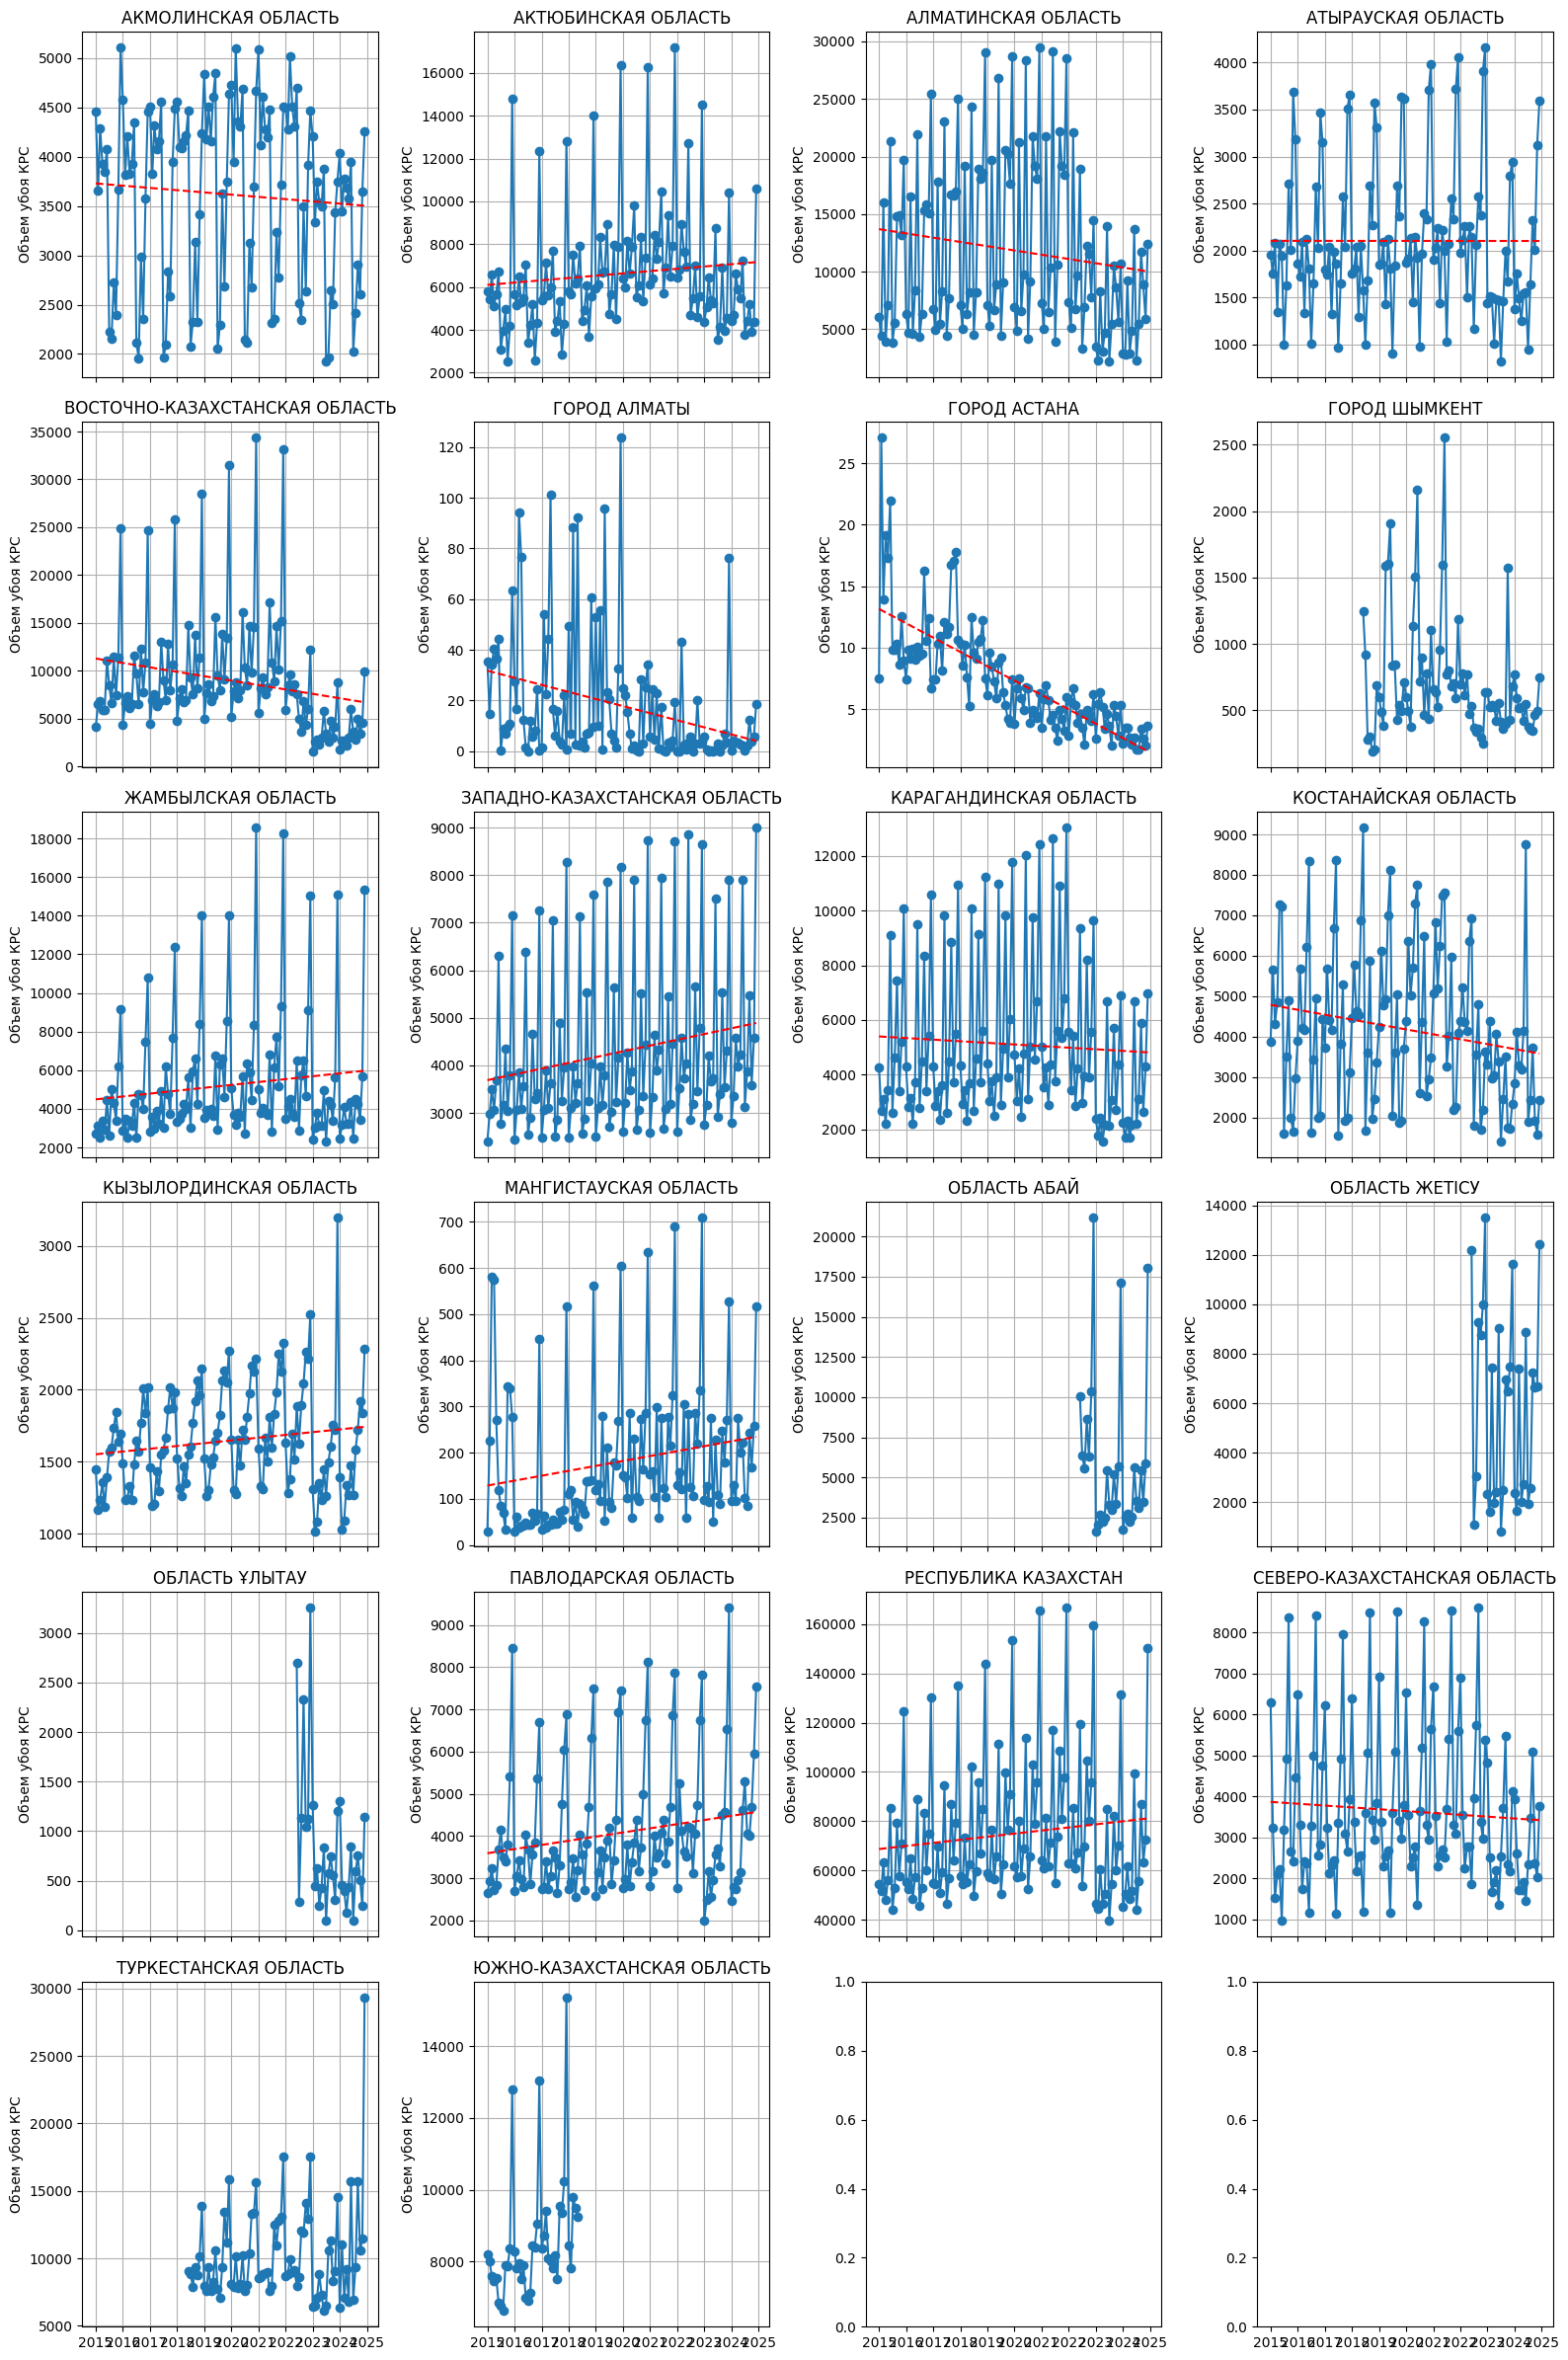

In [17]:
regions_to_plot = df_melted.index.get_level_values("Регион").unique()

# Remove ГОРОД АЛМАТЫ - no data
regions_to_plot = [region for region in regions_to_plot]

# Define the number of rows and columns for subplots
num_regions = len(regions_to_plot)
cols = 4  # Number of columns in the grid
rows = (num_regions // cols) + (num_regions % cols > 0)  # Auto-calculate rows

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4), sharex=True)

# Flatten axes array for easy iteration (works even if there's only one row)
axes = axes.flatten()

# Plot each region in its own subplot
for i, region in enumerate(regions_to_plot):
    if region in df_melted.index.get_level_values("Регион").unique():
        region_data = df_melted.loc[region]

        # Plot the raw data
        axes[i].plot(region_data.index, region_data["Объем"], marker="o", linestyle="-", label=region)

        # Add a trendline in red
        # First, we need numeric x-values for fitting
        x = np.arange(len(region_data))  # Using array index positions
        y = region_data["Объем"].values

        # Fit a 1st-degree polynomial (linear)
        slope, intercept = np.polyfit(x, y, 1)
        trend = slope * x + intercept

        # Plot trendline in red
        axes[i].plot(region_data.index, trend, color="red", linestyle="--")

        axes[i].set_title(region)
        axes[i].set_ylabel("Объем убоя КРС")
        axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Skipping ГОРОД ШЫМКЕНТ due to 41 missing values.
Skipping ОБЛАСТЬ АБАЙ due to 89 missing values.
Skipping ОБЛАСТЬ ЖЕТІСУ due to 89 missing values.
Skipping ОБЛАСТЬ ҰЛЫТАУ due to 89 missing values.
Skipping ТУРКЕСТАНСКАЯ ОБЛАСТЬ due to 41 missing values.
Skipping ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ due to 79 missing values.


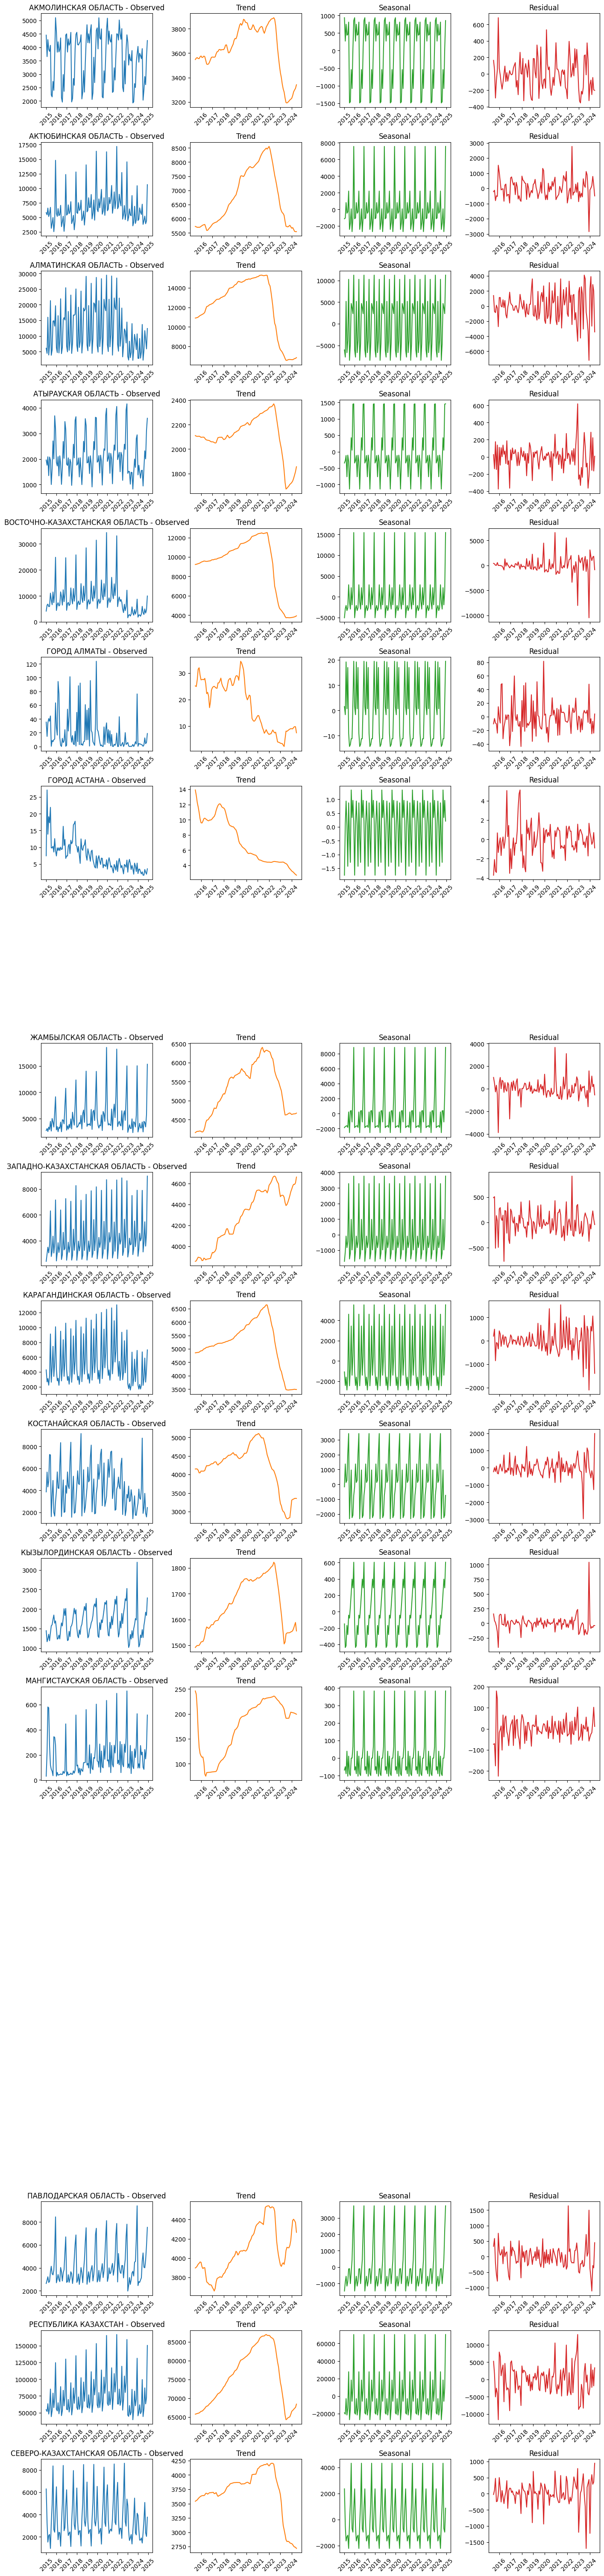

In [18]:
regions_to_plot = df_melted.index.get_level_values("Регион").unique()
#  remove a region if it has no data
regions_to_plot = [region for region in regions_to_plot]

num_regions = len(regions_to_plot)

# Create a figure with (num_regions) rows and 4 columns
fig, axes = plt.subplots(nrows=num_regions, ncols=4, 
                         figsize=(14, 3 * num_regions),
                         sharex=False)

# If there's only 1 region, 'axes' won't be a 2D array; make it so by wrapping in a list
if num_regions == 1:
    axes = [axes]  # now axes[0] is the row, containing 4 subplots

for i, region in enumerate(regions_to_plot):
    region_data = df_melted.loc[region, "Объем"]
    missing_count = region_data.isna().sum()
    
    # Skip regions with missing values
    if missing_count > 0:
        print(f"Skipping {region} due to {missing_count} missing values.")
        # Hide this row of subplots
        for col in range(4):
            axes[i][col].set_visible(False)
        continue
    
    # Decompose (e.g., monthly data => period=12)
    decomposition = seasonal_decompose(region_data, model='additive', period=12)
    
    # Plot each component manually on the row i
    # Observed
    axes[i][0].plot(decomposition.observed, label='Observed', color='C0')
    axes[i][0].set_title(f"{region} - Observed")

    # Trend
    axes[i][1].plot(decomposition.trend, label='Trend', color='C1')
    axes[i][1].set_title("Trend")

    # Seasonal
    axes[i][2].plot(decomposition.seasonal, label='Seasonal', color='C2')
    axes[i][2].set_title("Seasonal")

    # Residual
    axes[i][3].plot(decomposition.resid, label='Residual', color='C3')
    axes[i][3].set_title("Residual")

    # Rotate tick labels on x-axis for all subplots in this row
    for col in range(4):
        axes[i][col].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


#### Check Autocorrelation

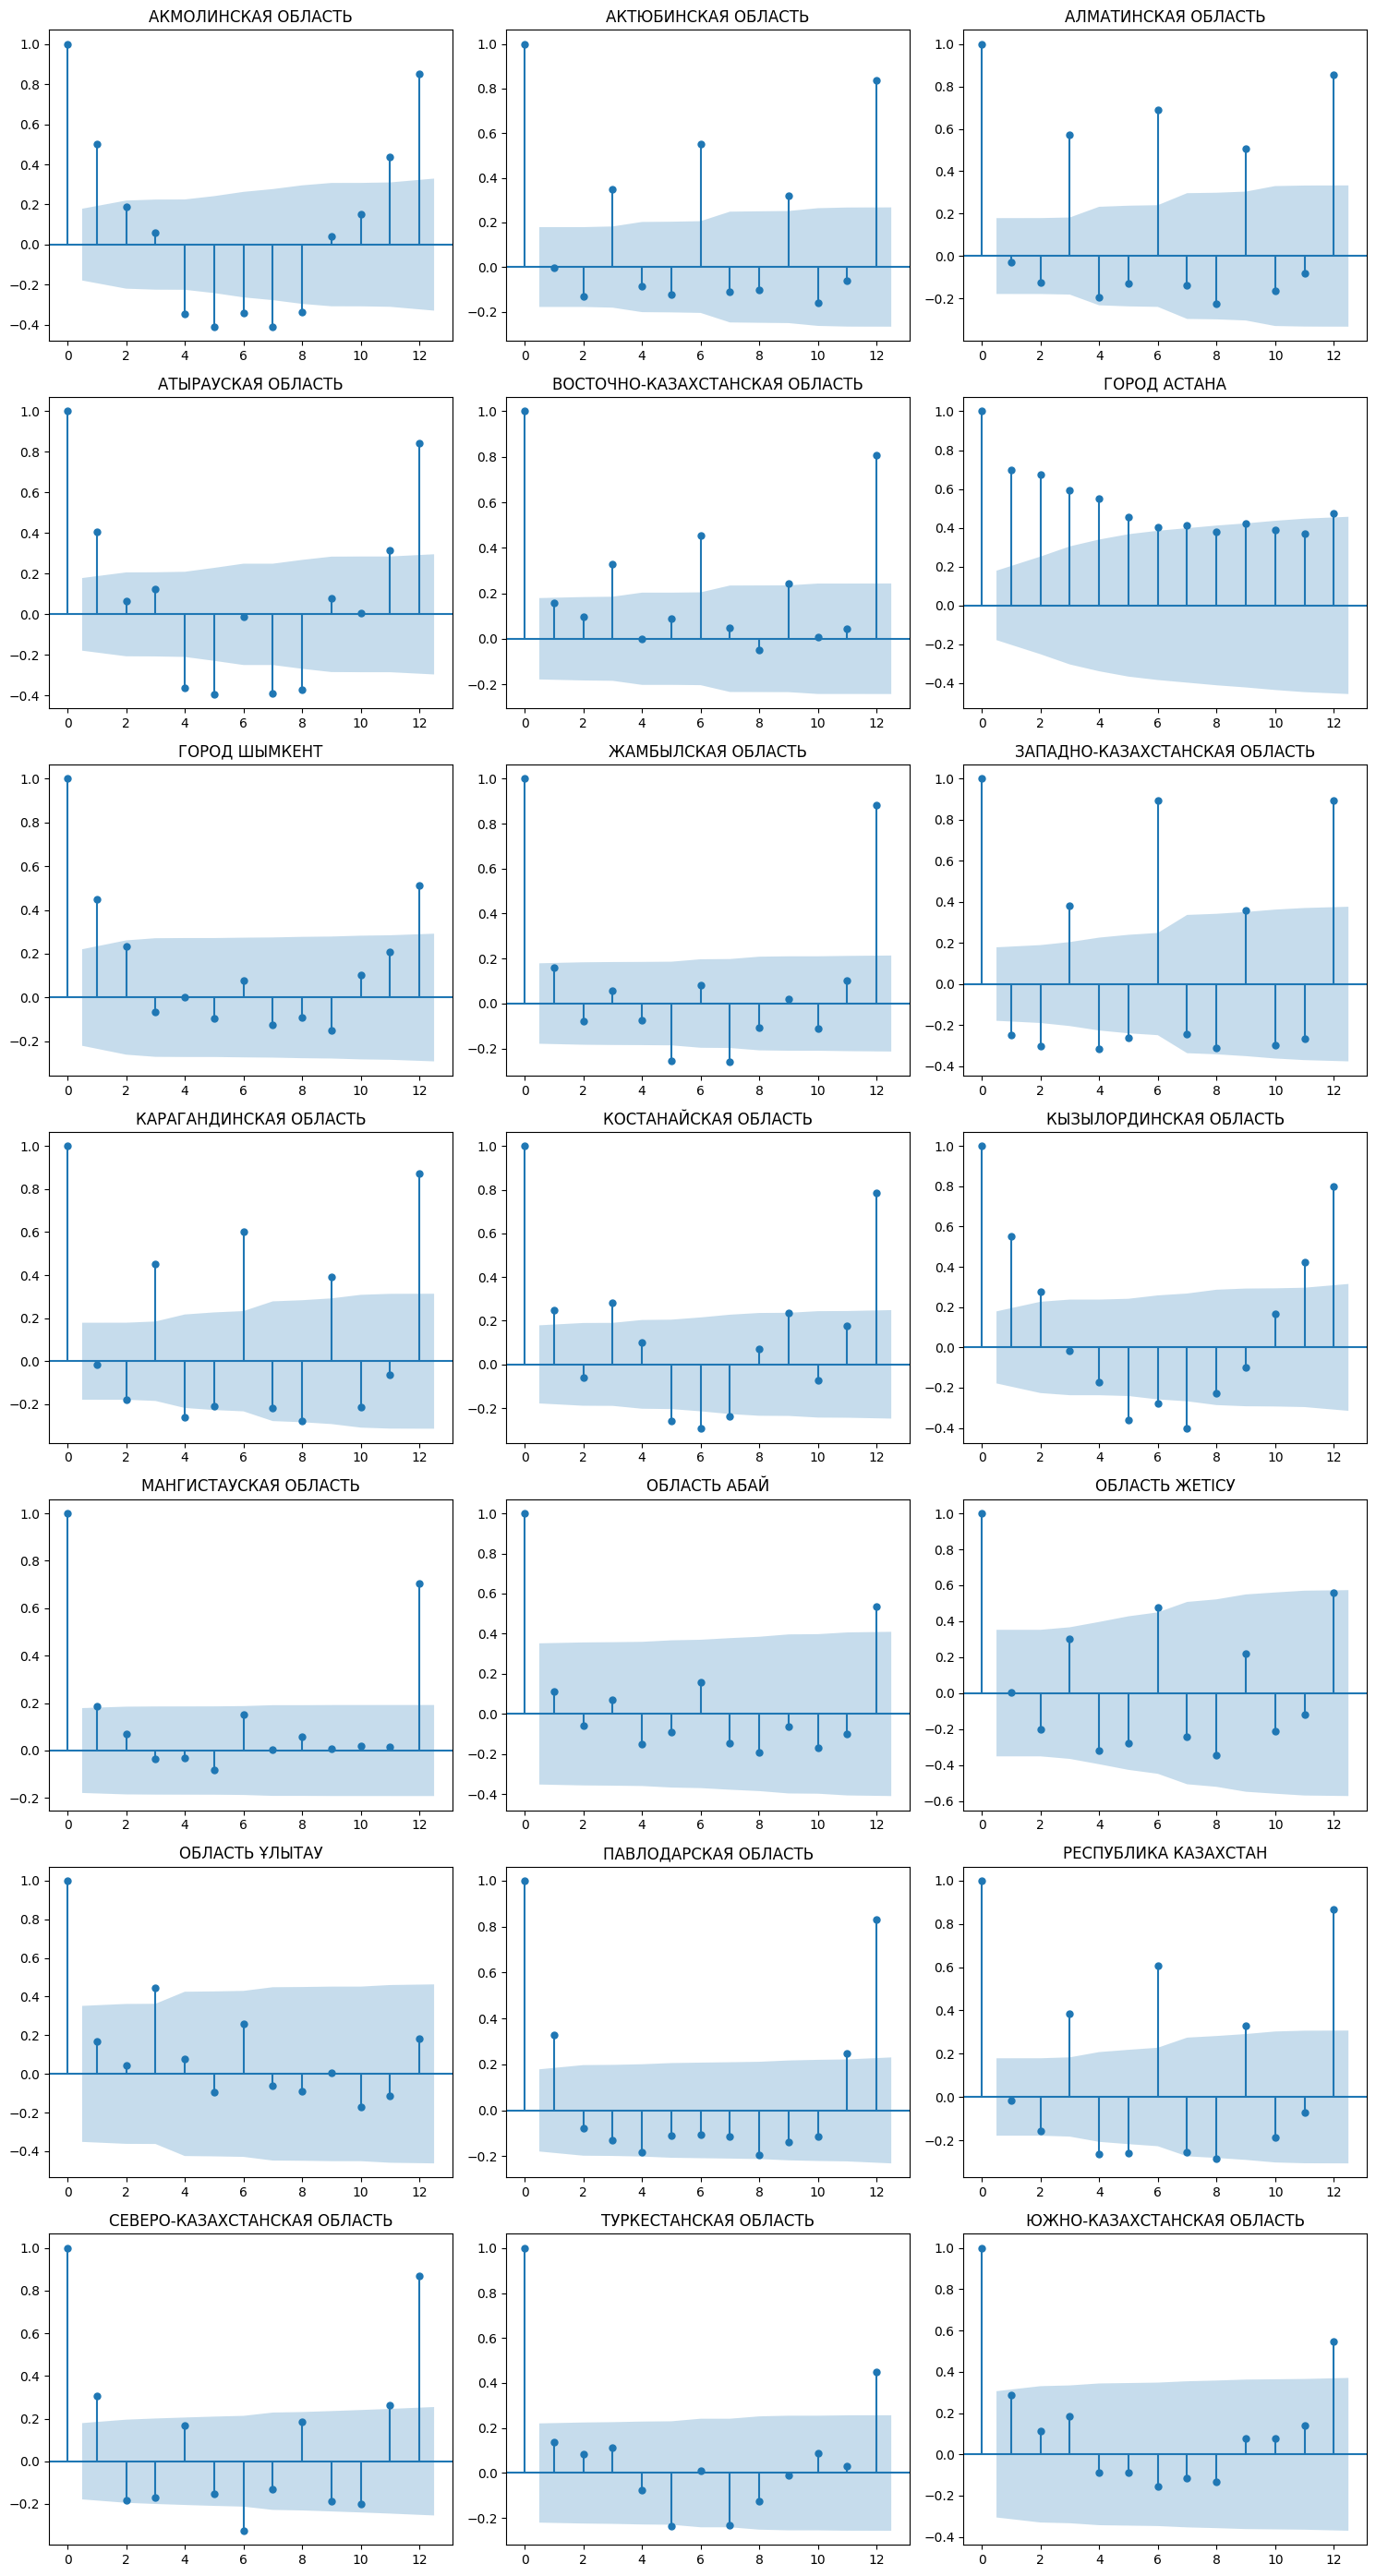

In [203]:
# Get a list of regions
regions_to_plot = df_melted.index.get_level_values("Регион").unique()

# Remove ГОРОД АЛМАТЫ
regions_to_plot = [r for r in regions_to_plot if r != "ГОРОД АЛМАТЫ"]

num_regions = len(regions_to_plot)
cols = 3
rows = (num_regions // cols) + (num_regions % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))

# Flatten axes array for easy iteration if there are multiple rows/columns
axes = axes.flatten()

for i, region in enumerate(regions_to_plot):
    region_data = df_melted.loc[region, "Объем"].dropna()

    # Plot ACF on the current subplot axis
    plot_acf(region_data, lags=12, ax=axes[i])
    axes[i].set_title(region)
    axes[i].axis("tight")

# If there are extra subplot panels, turn them off
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### Perform Augmented Dickey-Fuller (ADF) test

In [204]:
def adf_test_table(df_melted):
    # We'll store each region's results in a list of dictionaries, then
    # convert to a DataFrame to display as a table using .to_string().
    results = []

    for region in df_melted.index.get_level_values("Регион").unique():
        region_data = df_melted.loc[region]["Объем"]
        missing_count = region_data.isna().sum()
        
        # If there are missing values, do not run ADF test
        if missing_count > 0:
            results.append({
                "Region": region,
                "Missing Values": missing_count,
                "ADF Statistic": "",
                "p-value": "",
                "Conclusion": "Skipped (missing values)"
            })
        else:
            # Perform ADF test
            adf_stat, p_value, used_lag, n_obs, crit_vals, icbest = adfuller(region_data.dropna())
            
            # Stationary conclusion
            if p_value <= 0.05:
                conclusion = "**stationary** (reject H0)"
            else:
                conclusion = "**non-stationary** (fail to reject H0)"

            results.append({
                "Region": region,
                "Missing Values": "",
                "ADF Statistic": adf_stat,
                "p-value": p_value,
                "Conclusion": conclusion
            })
    
    df_results = pd.DataFrame(results)
    
    print(df_results.to_string(index=False))


adf_test_table(df_melted)

                        Region Missing Values ADF Statistic   p-value                             Conclusion
           АКМОЛИНСКАЯ ОБЛАСТЬ                    -1.236489  0.657706 **non-stationary** (fail to reject H0)
           АКТЮБИНСКАЯ ОБЛАСТЬ                    -1.286654  0.635256 **non-stationary** (fail to reject H0)
           АЛМАТИНСКАЯ ОБЛАСТЬ                    -0.854609  0.802553 **non-stationary** (fail to reject H0)
            АТЫРАУСКАЯ ОБЛАСТЬ                     -2.13427   0.23096 **non-stationary** (fail to reject H0)
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ                    -0.943335  0.773367 **non-stationary** (fail to reject H0)
                  ГОРОД АЛМАТЫ                    -0.826698  0.811154 **non-stationary** (fail to reject H0)
                  ГОРОД АСТАНА                    -0.496442  0.892709 **non-stationary** (fail to reject H0)
                 ГОРОД ШЫМКЕНТ             41                                       Skipped (missing values)
            ЖАМБЫЛС